In [10]:
import numpy as np
import pandas as pd

In [49]:
train = pd.read_csv("train1.csv")

In [50]:
train.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 15.4+ MB


In [92]:
train = train.fillna('empty')

In [7]:
import matplotlib.pyplot as plt

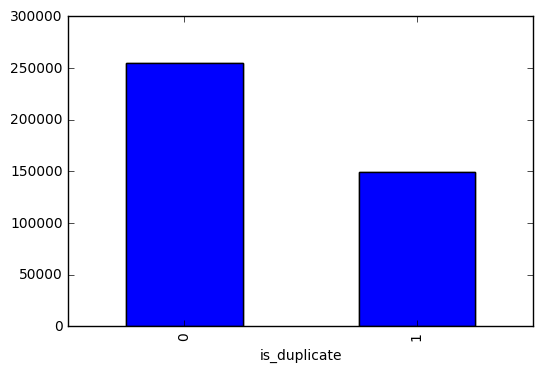

In [9]:
train.groupby("is_duplicate")['id'].count().plot.bar()
plt.show()

In [3]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

In [5]:
stop_words

[u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u"aren't",
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u"can't",
 u'cannot',
 u'could',
 u"couldn't",
 u'did',
 u"didn't",
 u'do',
 u'does',
 u"doesn't",
 u'doing',
 u"don't",
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u"hadn't",
 u'has',
 u"hasn't",
 u'have',
 u"haven't",
 u'having',
 u'he',
 u"he'd",
 u"he'll",
 u"he's",
 u'her',
 u'here',
 u"here's",
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u"how's",
 u'i',
 u"i'd",
 u"i'll",
 u"i'm",
 u"i've",
 u'if',
 u'in',
 u'into',
 u'is',
 u"isn't",
 u'it',
 u"it's",
 u'its',
 u'itself',
 u"let's",
 u'me',
 u'more',
 u'most',
 u"mustn't",
 u'my',
 u'myself',
 u'no',
 u'nor',
 u'not',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'ought',
 u'our',
 u'ours',
 u'ourselves',

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation

In [46]:
def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
    # Clean the text, with the option to remove stop_words and to stem words.

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r"셲", "", text)
    text = re.sub(r"횞", "", text)
    text = re.sub(r"쐏", "", text)
    text = re.sub(r"쏷", "", text)
    text = re.sub(r"셶", "", text)
    
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [47]:
def process_questions(question_list, questions, question_list_name, dataframe):
    '''transform questions and display progress'''
    for question in questions:
        question_list.append(text_to_wordlist(question))
        if len(question_list) % 100000 == 0:
            progress = len(question_list)/len(dataframe) * 100
            print("{} is {}% complete.".format(question_list_name, round(progress, 1)))

In [20]:
train_question1 = []
process_questions(train_question1, train.question1, 'train_question1', train)

train_question1 is 0.0% complete.
train_question1 is 0.0% complete.
train_question1 is 0.0% complete.
train_question1 is 0.0% complete.


In [52]:
train_question1 = []
process_questions(train_question1, train.question1, 'train_question1', train)

train_question1 is 0.0% complete.
train_question1 is 0.0% complete.
train_question1 is 0.0% complete.
train_question1 is 0.0% complete.


In [93]:
train_question2 = []
process_questions(train_question2, train.question2, 'train_question2', train)

train_question2 is 0.0% complete.
train_question2 is 0.0% complete.
train_question2 is 0.0% complete.
train_question2 is 0.0% complete.


In [27]:
train_question1

['What step step guide invest share market India',
 'What story Kohinoor Koh Noor Diamond',
 'How can I increase speed internet connection using VPN',
 'Why I mentally lonely How can I solve',
 'Which one dissolve water quickly sugar salt methane carbon di oxide',
 'astrology I Capricorn Sun Cap moon cap rising say',
 'Should I buy tiago',
 'How can I good geologist',
 'When use instead',
 'Motorola company Can I hack Charter Motorolla DCX3400',
 'method find separation slits using fresnel biprism',
 'How I read find YouTube comments',
 'What can make Physics easy learn',
 'What first sexual experience like',
 'What laws change status student visa green card America compare immigration laws Canada',
 'What Trump presidency mean current international master s students F1 visa',
 'What manipulation mean',
 'Why girls want friends guy reject',
 'Why many Quora users posting questions readily answered Google',
 'Which best digital marketing institution Banglore',
 'Why rockets look white',

In [96]:
a = 0 
for i in range(a,a+10):
    print(train_question1[i])
    print(train_question2[i])
    print "*" * 100

What step step guide invest share market India
What step step guide invest share market
****************************************************************************************************
What story Kohinoor Koh Noor Diamond
What happen Indian government stole Kohinoor Koh Noor diamond back
****************************************************************************************************
How can I increase speed internet connection using VPN
How can Internet speed increased hacking DNS
****************************************************************************************************
Why I mentally lonely How can I solve
find remainder math 23 24 math divided 24 23
****************************************************************************************************
Which one dissolve water quickly sugar salt methane carbon di oxide
Which fish survive salt water
****************************************************************************************************
astrology I Capricorn 